1. Load the .csv file into a pandas data-frame (DataFrame) called df_prob1 with appropriate rows and columns. Each row must represent an individual object, while each column must represent a particular attribute/variable (Object Number, Title, Dynasty, etc.)

In [2]:
import pandas as pd
pd.set_option('display.width', 1000)

df_prob1 = pd.read_csv('MetObjects_Subset.csv')
print(df_prob1)

          Object Number  Is Highlight  Is Public Domain  Object ID         Department Object Name                         Title   Culture  Period  Dynasty  ...  Locale  Locus Excavation River Classification Rights and Reproduction                                      Link Resource             Metadata Date                                Repository Tags
0            1979.486.1         False             False          1  The American Wing        Coin  One-dollar Liberty Head Coin       NaN     NaN      NaN  ...     NaN    NaN        NaN   NaN          Metal                     NaN   http://www.metmuseum.org/art/collection/search/1                       NaN  Metropolitan Museum of Art, New York, NY  NaN
1            1980.264.5         False             False          2  The American Wing        Coin  Ten-dollar Liberty Head Coin       NaN     NaN      NaN  ...     NaN    NaN        NaN   NaN          Metal                     NaN   http://www.metmuseum.org/art/collection/search/2         

2. Many columns of this data are missing entirely (i.e. no values are present for any objects). Use Python to determine which columns are missing for all of the provided objects and create a modified copy of df_prob1 that excludes these columns entirely called df_prob2. Hint: There are multiple ways to do this, but you may want to look into the pandas member function isna.

In [3]:
import pandas as pd
pd.set_option('display.width', 1000)

df_prob1 = pd.read_csv('MetObjects_Subset.csv')

# remove columns that are not missing any values
df_prob2 = df_prob1.dropna(axis=1, how='all') # axis=1 means columns, how='all' means all values in the column are missing
print(df_prob2)

          Object Number  Is Highlight  Is Public Domain  Object ID         Department Object Name                         Title   Culture Artist Role Artist Prefix  ... State County        Country Region Classification Rights and Reproduction                                      Link Resource             Metadata Date                                Repository  Tags
0            1979.486.1         False             False          1  The American Wing        Coin  One-dollar Liberty Head Coin       NaN       Maker           NaN  ...   NaN    NaN            NaN    NaN          Metal                     NaN   http://www.metmuseum.org/art/collection/search/1                       NaN  Metropolitan Museum of Art, New York, NY   NaN
1            1980.264.5         False             False          2  The American Wing        Coin  Ten-dollar Liberty Head Coin       NaN       Maker           NaN  ...   NaN    NaN            NaN    NaN          Metal                     NaN   http://www.metmuseu

3. Suppose we are only interested in objects in the public domain. You are to create a copy of df_prob2 called df_prob3 that consists only of those objects where the “Is Public Domain” column is “TRUE”; note that if the “Is Public Domain” column does not contain any string for a given object, it should not be present in df_prob3.

In [4]:
import pandas as pd
pd.set_option('display.width', 1000)

df_prob1 = pd.read_csv('MetObjects_Subset.csv')

# remove columns that are not missing any values
df_prob2 = df_prob1.dropna(axis=1, how='all')

# remove rows that are not public domain
df_prob3 = df_prob2[df_prob2['Is Public Domain'] == True] # Select rows where the column 'Is Public Domain' is True
print(df_prob3)

        Object Number  Is Highlight  Is Public Domain  Object ID         Department    Object Name                                              Title                    Culture   Artist Role Artist Prefix  ...          State         County        Country Region      Classification Rights and Reproduction                                      Link Resource             Metadata Date                                Repository                         Tags
33         1970.289.6         False              True         34  The American Wing          Clock                                        Acorn Clock                   American         Maker           NaN  ...            NaN            NaN  United States    NaN           Furniture                     NaN  http://www.metmuseum.org/art/collection/search/34  2019-10-10T14:49:16.057Z  Metropolitan Museum of Art, New York, NY             Landscapes|Boats
36          38.165.51         False              True         37  The American Wing         

4. The objects in the dataset include a column “Artist Role.” You are to create a copy of df_prob3 called df_prob4 that includes the string “Maker” within the “Artist Role” column. Note – while this may seem trivial, the “Artist Role” column can contain multiple roles for a given object. You must be certain that if at least one of the roles is Maker, then the object/row will appear in the df_prob4 data-frame. Hint: you can use regular expressions for this problem, but it is not required, nor is it likely the easiest way to handle the problem.

In [1]:
import pandas as pd
pd.set_option('display.width', 1000)
df_prob1 = pd.read_csv('MetObjects_Subset.csv')

# remove columns that are not missing any values
df_prob2 = df_prob1.dropna(axis=1, how='all')

# remove rows that are not public domain
df_prob3 = df_prob2[df_prob2['Is Public Domain'] == True] # Select rows where the column 'Is Public Domain' is True

# Remove rows where artist role does not contain "Maker"
df_prob4 = df_prob3[df_prob3['Artist Role'].str.contains('Maker', na=False)] # Select rows where the column 'Artist Role' contains "Maker"
print(df_prob4)

        Object Number  Is Highlight  Is Public Domain  Object ID         Department          Object Name                            Title                    Culture        Artist Role  Artist Prefix  ...          State         County        Country         Region Classification Rights and Reproduction                                      Link Resource             Metadata Date                                Repository                         Tags
33         1970.289.6         False              True         34  The American Wing                Clock                      Acorn Clock                   American              Maker            NaN  ...            NaN            NaN  United States            NaN      Furniture                     NaN  http://www.metmuseum.org/art/collection/search/34  2019-10-10T14:49:16.057Z  Metropolitan Museum of Art, New York, NY             Landscapes|Boats
36          38.165.51         False              True         37  The American Wing               

Note: for part 5 you will want to utilize the “Object Begin Date” and “Object End Date” columns in your data manipulation. The “Object Date” column is unreliable and largely missing in information.

5. For this part, you are to create a copy of df_prob4 called df_prob5 and add a new column to df_prob5 called DecadesToMake, which represents the number of decades that have elapsed between the start year and end year of the object’s creation rounded down. For example, an object with “Object Begin Date” of 1890 and “Object End Date” of 1910 would have a DecadesToMake value of 2, while another object with begin date of 1932 and end date of 1941 would have a DecadesToMake value of 0. Note: Any object missing either start date or end date, or with a start date and end date in the same year, should have a DecadesToMake value of 0.

In [1]:
import pandas as pd
pd.set_option('display.width', 1000)
df_prob1 = pd.read_csv('MetObjects_Subset.csv')

# remove columns that are not missing any values
df_prob2 = df_prob1.dropna(axis=1, how='all')

# remove rows that are not public domain
df_prob3 = df_prob2[df_prob2['Is Public Domain'] == True] # Select rows where the column 'Is Public Domain' is True

# Remove rows where artist role does not contain "Maker"
df_prob4 = df_prob3[df_prob3['Artist Role'].str.contains('Maker', na=False)] 

# Add a decades to make column
df_prob5 = df_prob4.copy()
df_prob5['DecadesToMake'] = (df_prob5['Object End Date'] - df_prob5['Object Begin Date']) // 10  # Calculate the decades to make by subtracting the 'Object Begin Date' from the 'Object End Date' and dividing by 10
print(df_prob5)


        Object Number  Is Highlight  Is Public Domain  Object ID         Department          Object Name                            Title                    Culture        Artist Role  Artist Prefix  ...         County        Country         Region Classification Rights and Reproduction                                      Link Resource             Metadata Date                                Repository                         Tags  DecadesToMake
33         1970.289.6         False              True         34  The American Wing                Clock                      Acorn Clock                   American              Maker            NaN  ...            NaN  United States            NaN      Furniture                     NaN  http://www.metmuseum.org/art/collection/search/34  2019-10-10T14:49:16.057Z  Metropolitan Museum of Art, New York, NY             Landscapes|Boats              0
36          38.165.51         False              True         37  The American Wing               

6. Most objects in the dataset have a Classification. For this problem, you are to produce a bar plot depicting the ten most common Classifications for objects in df_prob5, with classification labels on the x-axis and counts on the y-axis, sorted in descending order of counts from left to right. The example below should give you an idea of the format you want to use, but note that this was generated using the basic DataFrame (df_prob1) and will not reflect the expected results you will observe for df_prob5. In fact, you may not see some of these same classifications at all on your plot, for example.

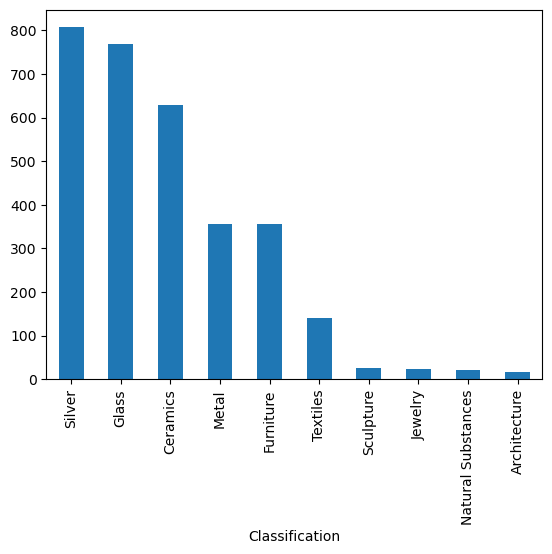

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 1000)
df_prob1 = pd.read_csv('MetObjects_Subset.csv')

# remove columns that are not missing any values
df_prob2 = df_prob1.dropna(axis=1, how='all') # drop columns that are all n/a

# remove rows that are not public domain
df_prob3 = df_prob2[df_prob2['Is Public Domain'] == True] # select rows where the column 'Is Public Domain' is True

# Remove rows where artist role does not contain "Maker"
df_prob4 = df_prob3[df_prob3['Artist Role'].str.contains('Maker', na=False)]  # select rows where the column 'Artist Role' contains the string 'Maker'

# Add a decades to make column
df_prob5 = df_prob4.copy()
df_prob5['DecadesToMake'] = (df_prob5['Object End Date'] - df_prob5['Object Begin Date']) // 10

# plot ten most common classifications
fig, ax = plt.subplots()
df_prob5['Classification'].value_counts().head(10).plot(ax=ax, kind='bar') # plot count of classifications
plt.show() # show plot